In [78]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import seaborn as sns

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)


dev_stats = pd.read_csv('data/gapminder.tsv', sep='\t')      #read data from .tsv file
print(dev_stats.head())              #displays first 5 observations from dataset

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


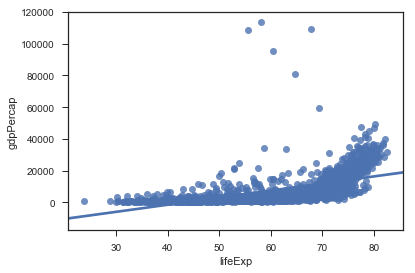

In [79]:
sns.regplot(x="lifeExp", y="gdpPercap", data=dev_stats)

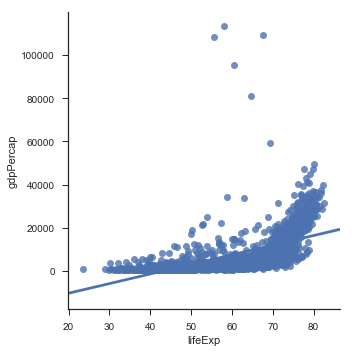

In [80]:
sns.lmplot(x="lifeExp", y="gdpPercap", data=dev_stats)

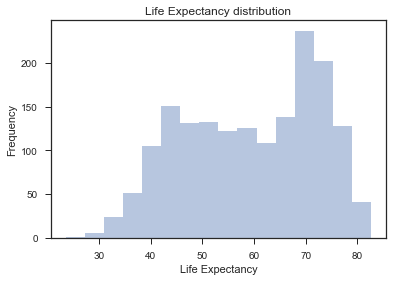

In [81]:
sns.distplot(dev_stats['lifeExp'], kde=False)
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.title('Life Expectancy distribution')

#### Boxplot for lifeExp, gdpPercapita, population per year

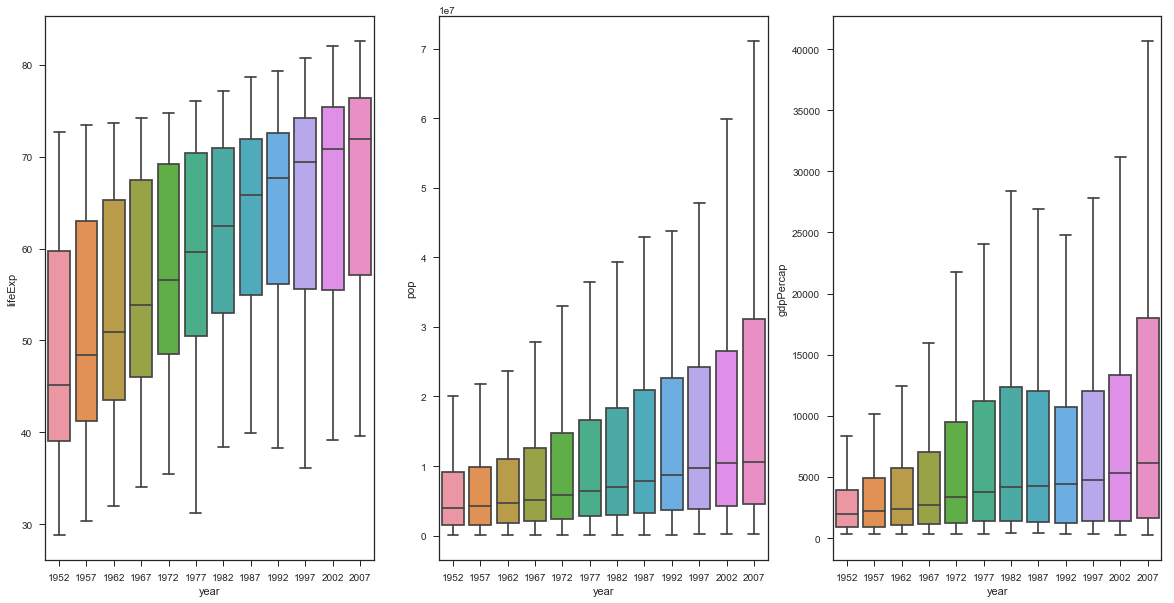

In [82]:
fig, axs = plt.subplots(ncols=3,figsize=(20,10))
sns.boxplot(x="year", y="lifeExp", data=dev_stats, showfliers=False, ax=axs[0])
sns.boxplot(x="year", y="pop", data=dev_stats, showfliers=False, ax=axs[1])
sns.boxplot(x="year", y="gdpPercap", data=dev_stats, showfliers=False, ax=axs[2])

In [83]:
mean_by_year = dev_stats.groupby('year')['lifeExp'].mean()      #Groups data in varables year and continent and give mean
mean_by_year

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

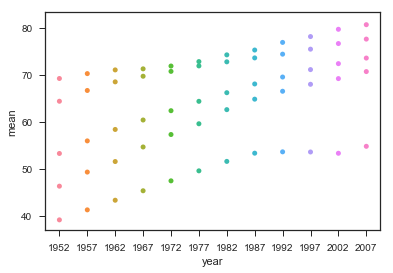

In [84]:
#grp_1 = dev_stats.groupby(['year','continent'])['lifeExp'].mean()
df1 = dev_stats.groupby(['year','continent'])['lifeExp'].agg(['mean']).reset_index()
#df1
sns.stripplot(x="year", y="mean", data=df1);

In [44]:
df2 = dev_stats[['country','lifeExp','year']]  #Subsetting columns, create a dataframe from a list of columns 
df2.set_index("country", inplace=True)
#df2.head()
lifeExp_Aus = df2.loc['Australia']
lifeExp_NZ = df2.loc['New Zealand']
lifeExp_Aus_NZ = pd.concat([lifeExp_Aus, lifeExp_NZ], ignore_index=False)
lifeExp_Aus_NZ.reset_index(level=0, inplace=True)
lifeExp_Aus_NZ

        country  lifeExp  year
0     Australia   69.120  1952
1     Australia   70.330  1957
2     Australia   70.930  1962
3     Australia   71.100  1967
4     Australia   71.930  1972
5     Australia   73.490  1977
6     Australia   74.740  1982
7     Australia   76.320  1987
8     Australia   77.560  1992
9     Australia   78.830  1997
10    Australia   80.370  2002
11    Australia   81.235  2007
12  New Zealand   69.390  1952
13  New Zealand   70.260  1957
14  New Zealand   71.240  1962
15  New Zealand   71.520  1967
16  New Zealand   71.890  1972
17  New Zealand   72.220  1977
18  New Zealand   73.840  1982
19  New Zealand   74.320  1987
20  New Zealand   76.330  1992
21  New Zealand   77.550  1997
22  New Zealand   79.110  2002
23  New Zealand   80.204  2007

#### Factor Plot

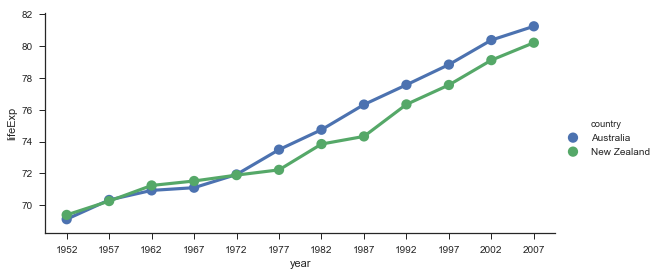

In [49]:
import seaborn as sns
sns.set(style="ticks")
sns.factorplot(x="year", y="lifeExp", hue = "country", data=lifeExp_Aus_NZ, aspect=2.0)

#### Point Plot

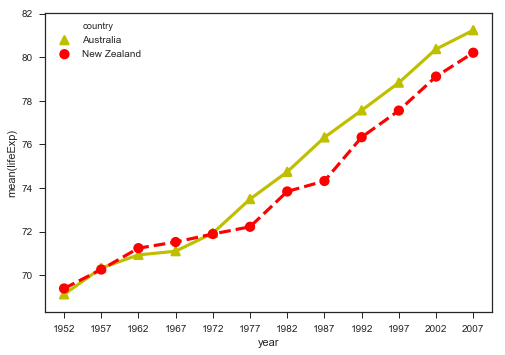

In [50]:
sns.pointplot(x="year", y="lifeExp", hue="country", data=lifeExp_Aus_NZ,
              palette={"Australia": "y", "New Zealand": "r"},
              markers=["^", "o"], linestyles=["-", "--"]);

#### References
https://seaborn.pydata.org/tutorial/ <br>
https://swcarpentry.github.io/python-novice-gapminder/09-plotting/ <br>